# SI Model

In [7]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [3]:
df=pd.read_csv('TOPSIS_result.csv')

In [4]:
df['RankingEC'] = df['EC'].rank(ascending=False)
df['RankingBC'] = df['BC'].rank(ascending=False)
df['RankingDC'] = df['DC'].rank(ascending=False)
df['RankingCC'] = df['CC'].rank(ascending=False)


In [5]:
top10=pd.DataFrame()
top10['BC']=df[df['RankingBC'].isin(range(1,11))].node.values
top10['CC']=df[df['RankingCC'].isin(range(1,11))].node.values
top10['EC']=df[df['RankingEC'].isin(range(1,11))].node.values
top10['DC']=df[df['RankingDC'].isin(range(1,11))].node.values
top10['TOPSIS']=df[df.index.isin(range(10))].node.values

In [6]:
top10

,BC,CC,EC,DC,TOPSIS
0,107,107,1912,107,107
1,1684,1684,2266,1684,1684
2,1912,58,2233,1912,1912
3,3437,428,2206,3437,3437
4,0,563,2142,0,0
5,1085,414,2218,2347,1085
6,698,348,2078,2543,698
7,567,483,2464,1888,567
8,58,376,2123,1800,58
9,428,171,1993,1663,428


si_model(measure) (measure='DC' or 'CC' .....) returns a list of iterations and infected and suceptible nodes 

In [42]:
def si_model(measure):
    top=set(top10[measure].values.tolist())
    model = ep.SIModel(G1)
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 1)#cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration("Infected", top)
    model.set_initial_status(cfg)
    iterations = model.iteration_bunch(100)
    S=[]
    I=[]
    it=[]
    for t in iterations:
        S.append(t['node_count'][0])
        I.append(t['node_count'][1])
        it.append(t['iteration'])
        if t['node_count'][1]==4039:
            break
    row=[it,I,S]
    return(row)

Execute the SI model 1000 times on top 10 influencial nodes to extract for each measure and topsis ,DC,CC,BC,EC contains the results of the fifties executions 

In [43]:
DC=[]
CC=[]
BC=[]
EC=[]
TOPSIS=[]
#for i in range(1000):
DC.append(si_model('DC'))
CC.append(si_model('CC'))
BC.append(si_model('BC'))
EC.append(si_model('EC'))
TOPSIS.append(si_model('TOPSIS'))

Std_mean(lis) takes as argumesnt the fifty execution results to return a dictionary that specifies for one iteration what are the values of infected nodes in each execution

In [44]:
def Std_mean(lis):
    dc={}
    for i in range(1):#range(1000)
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]

    for i in range(1):#range(1000)
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][1][j])
    return dc

# #calculate the mean and standerd deviation of infected nodes per iteration for each measure

In [45]:
stdsDC=[]
meansDC=[]
dc=Std_mean(DC)
for i in dc:
    stdsDC.append(np.std(dc[i]))
    meansDC.append(np.mean(dc[i]))

In [46]:
dc

{0: [10], 1: [3463], 2: [3838], 3: [3984], 4: [4039]}

In [36]:
stdsDC

[0.0,
 25.23965134466005,
 55.440057720027674,
 56.19252619343608,
 65.79179280123014,
 67.71115122341371,
 63.663490322161884,
 46.20562736290895,
 14.347125147568763,
 4.445222154178573,
 1.16619037896906,
 0.39999999999999997,
 0.8944271909999159,
 0.9428090415820634,
 0.0,
 0.0,
 0.0]

In [47]:
stdsCC=[]
meansCC=[]
d=Std_mean(CC)
for i in d:
    stdsCC.append(np.std(d[i]))
    meansCC.append(np.mean(d[i]))

In [48]:
stdsEC=[]
meansEC=[]
d=Std_mean(EC)
for i in d:
    stdsEC.append(np.std(d[i]))
    meansEC.append(np.mean(d[i]))

In [49]:
stdsBC=[]
meansBC=[]
d=Std_mean(BC)
for i in d:
    stdsBC.append(np.std(d[i]))
    meansBC.append(np.mean(d[i]))

In [50]:
stdsTOPSIS=[]
meansTOPSIS=[]
d=Std_mean(TOPSIS)
for i in d:
    stdsTOPSIS.append(np.std(d[i]))
    meansTOPSIS.append(np.mean(d[i]))

note : the standard deviation and the mean are used in this script because we had to execute 1000 times with beta=0.3 but with beta=1 we dont need to calculate the mean we can plot the results directly 

In [51]:
dc=Std_mean(DC)
cc=Std_mean(CC)
ec=Std_mean(EC)
bc=Std_mean(BC)
topsis=Std_mean(TOPSIS)

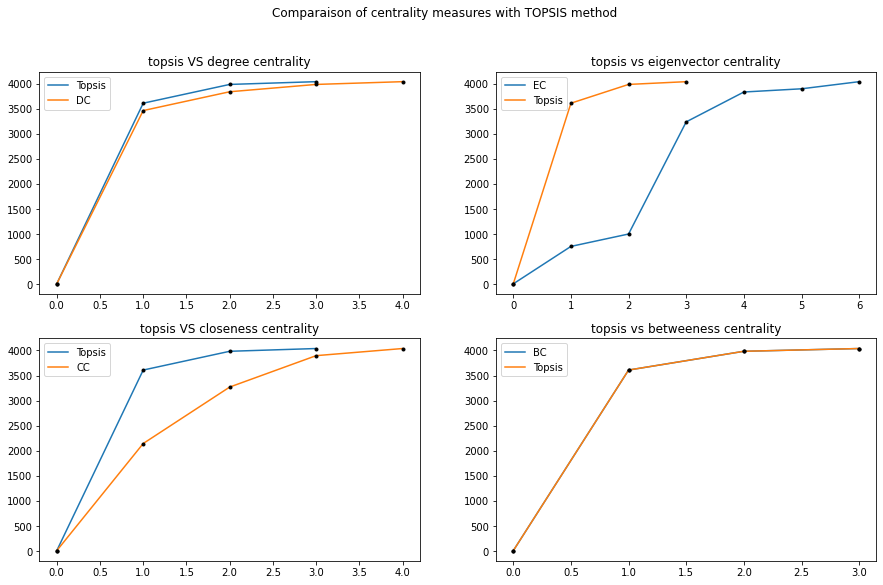

In [54]:
fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(topsis.keys(), meansTOPSIS, label='Topsis')
ax[0, 0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 0].plot(dc.keys() , meansDC, label='DC')
ax[0, 0].errorbar(dc.keys() , meansDC, yerr=stdsDC, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(topsis.keys(), meansTOPSIS, label='Topsis')
ax[1, 0].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1, 0].plot(cc.keys() , meansCC, label='CC')
ax[1, 0].errorbar(cc.keys() , meansCC, yerr=stdsCC, fmt ='.k')

ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(ec.keys() , meansEC, label='EC')
ax[0, 1].errorbar(ec.keys() , meansEC, yerr=stdsEC, fmt ='.k')
ax[0, 1].plot(topsis.keys(), meansTOPSIS, label='Topsis')
ax[0, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].plot(topsis.keys(), meansTOPSIS, label='BC')
ax[1, 1].errorbar(topsis.keys(), meansTOPSIS, yerr=stdsTOPSIS, fmt ='.k')
ax[1, 1].plot(bc.keys() , meansBC, label='Topsis')
ax[1, 1].errorbar(bc.keys() , meansBC, yerr=stdsBC, fmt ='.k')
ax[1, 1].legend()


fig.suptitle('Comparaison of centrality measures with TOPSIS method')
plt.show()